In [1]:
from help_funcs.evaluation import evaluate_model, epistemic, get_pca_plots
from sklearn.metrics import f1_score

# GCN Multi-class

train loss: 0.9816800355911255, accuracy: 57.82, f1:0.34
val loss: 0.97920161485672, accuracy: 44.44, f1:0.23
test loss: 1.2514183521270752, accuracy: 42.86, f1:0.21


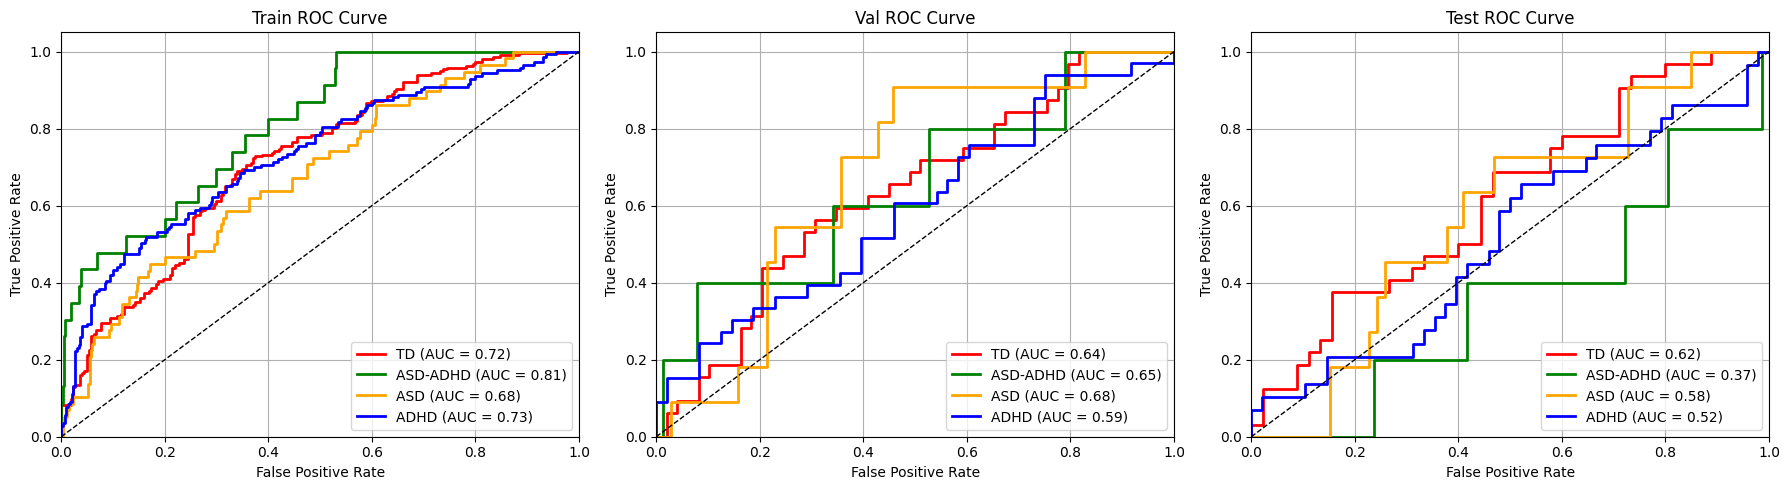

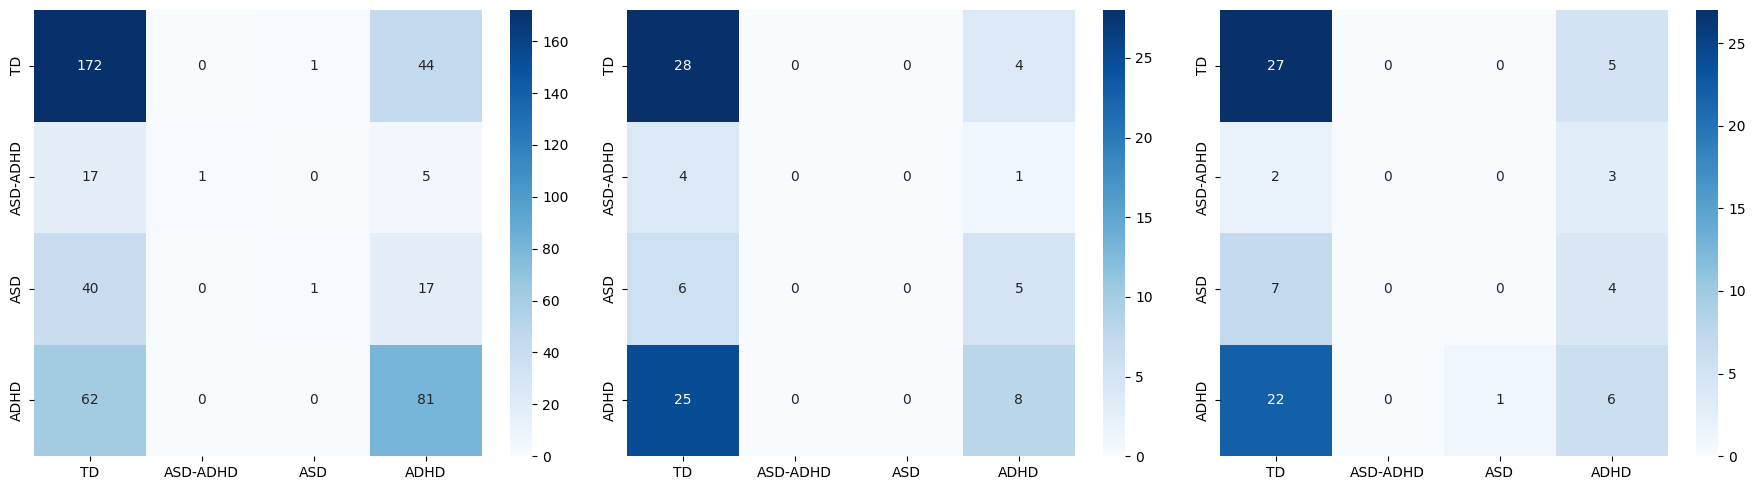

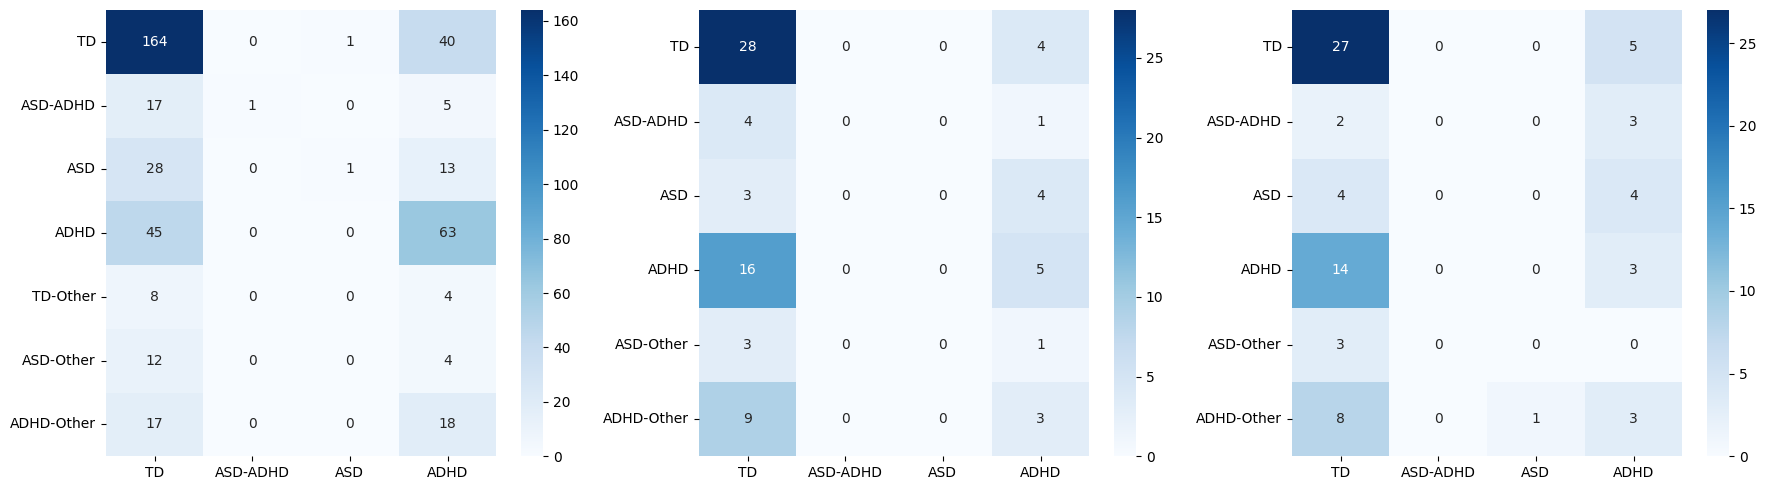

In [2]:
softmax_data = evaluate_model(yaml_file = "saved_models/GCN_Multi_absolute_weights.yaml", 
                            model_file = "saved_models/GCN_Multi_absolute_weights.pt", 
                            drop_strategy = None, 
                            gat = False)

# GCN Binary-class

train loss: 0.554794430732727, accuracy: 69.39, f1:0.69
val loss: 0.5222153067588806, accuracy: 65.43, f1:0.65
test loss: 0.5780280828475952, accuracy: 61.04, f1:0.61


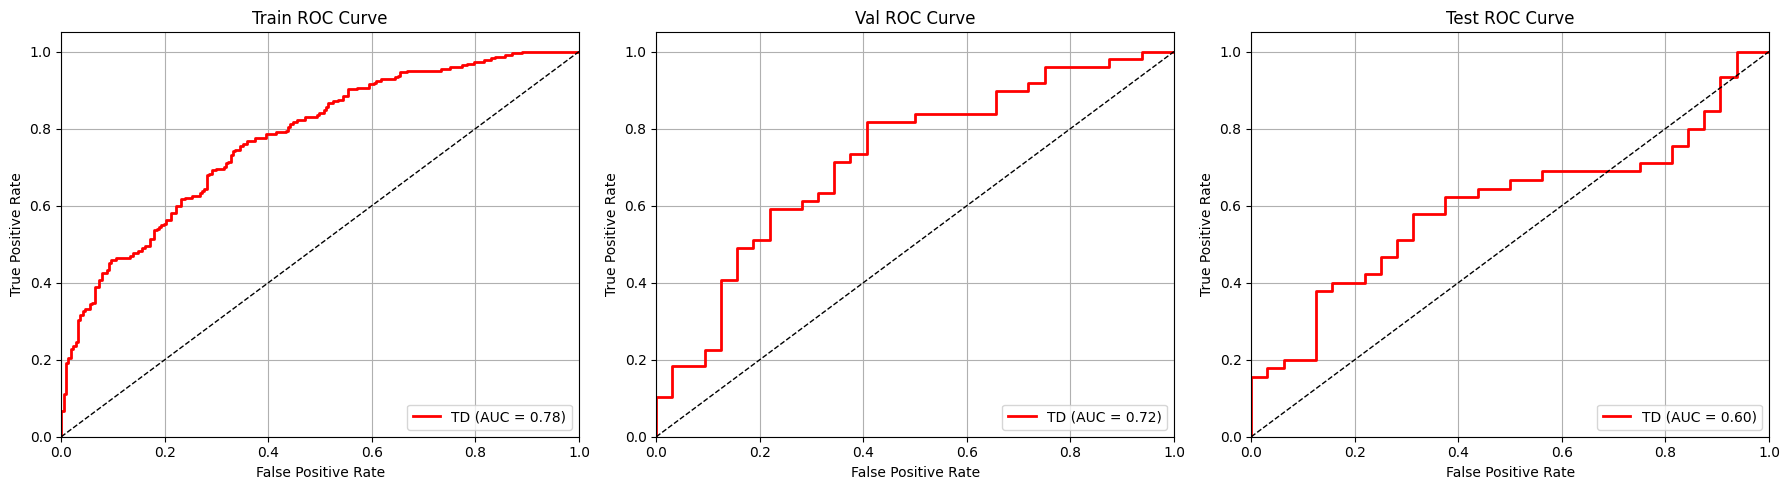

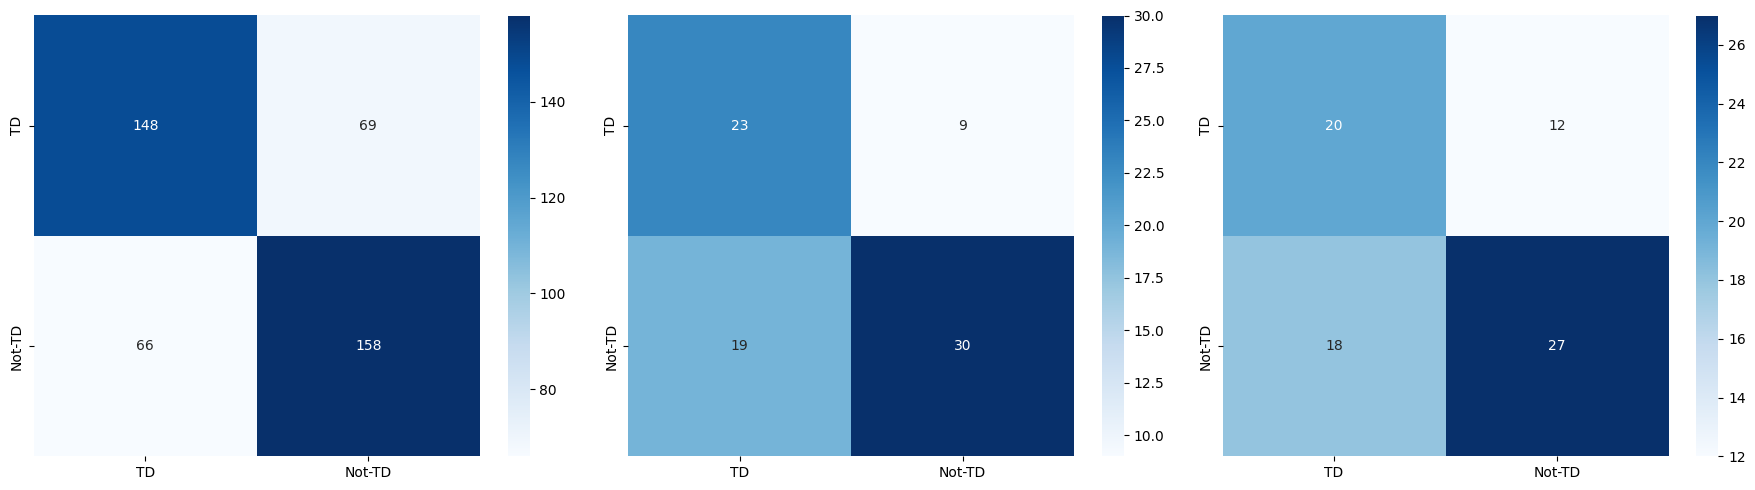

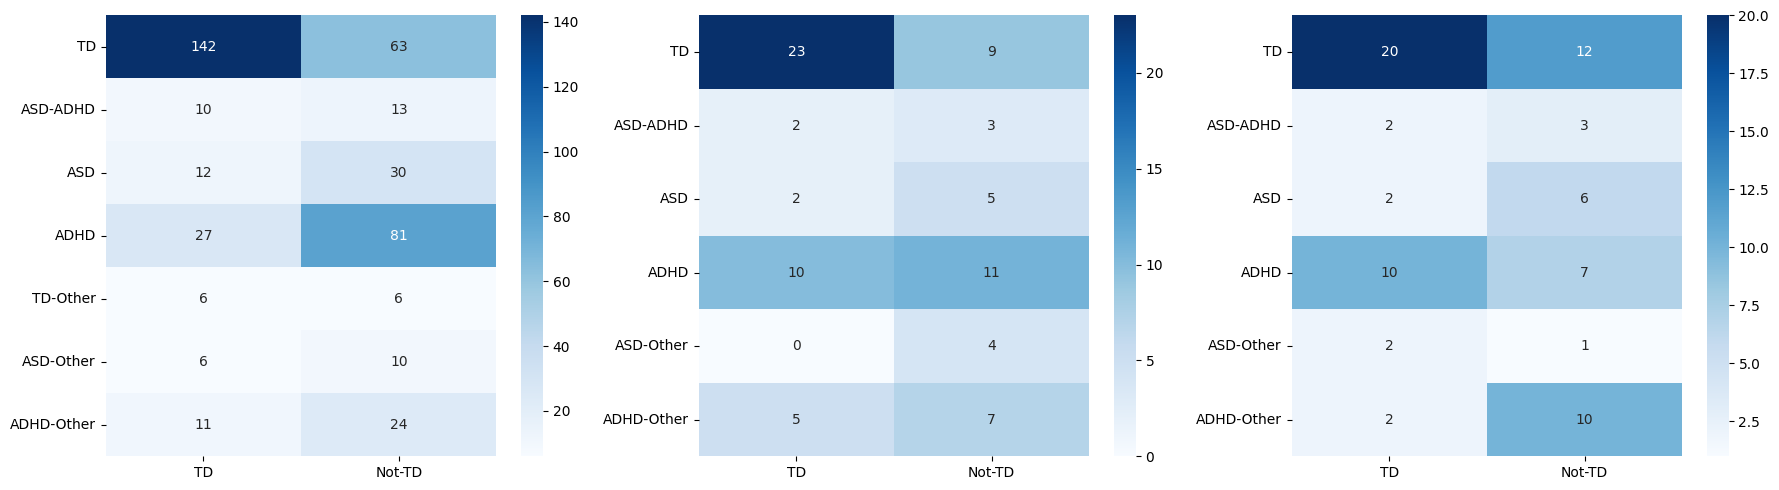

,label,predicted,softmax_values
0,TD,Not-TD,[0.5472467541694641]
1,TD,TD,[0.4733259975910187]
2,TD,Not-TD,[0.6302390694618225]
3,Not-TD,Not-TD,[0.5881670713424683]
4,Not-TD,Not-TD,[0.7684990167617798]
...,...,...,...
436,Not-TD,Not-TD,[0.500506579875946]
437,Not-TD,Not-TD,[0.7893200516700745]
438,TD,TD,[0.4699714183807373]
439,TD,TD,[0.29943716526031494]


In [3]:
evaluate_model(yaml_file = "saved_models/GCN_Binary_absolute_weights.yaml", 
               model_file = "saved_models/GCN_Binary_absolute_weights.pt", 
               drop_strategy = None, 
               gat = False)

# GAT Multi-class

train loss: 0.8160125017166138, accuracy: 66.21, f1:0.52
val loss: 0.909799337387085, accuracy: 56.79, f1:0.35
test loss: 1.3263485431671143, accuracy: 37.66, f1:0.21


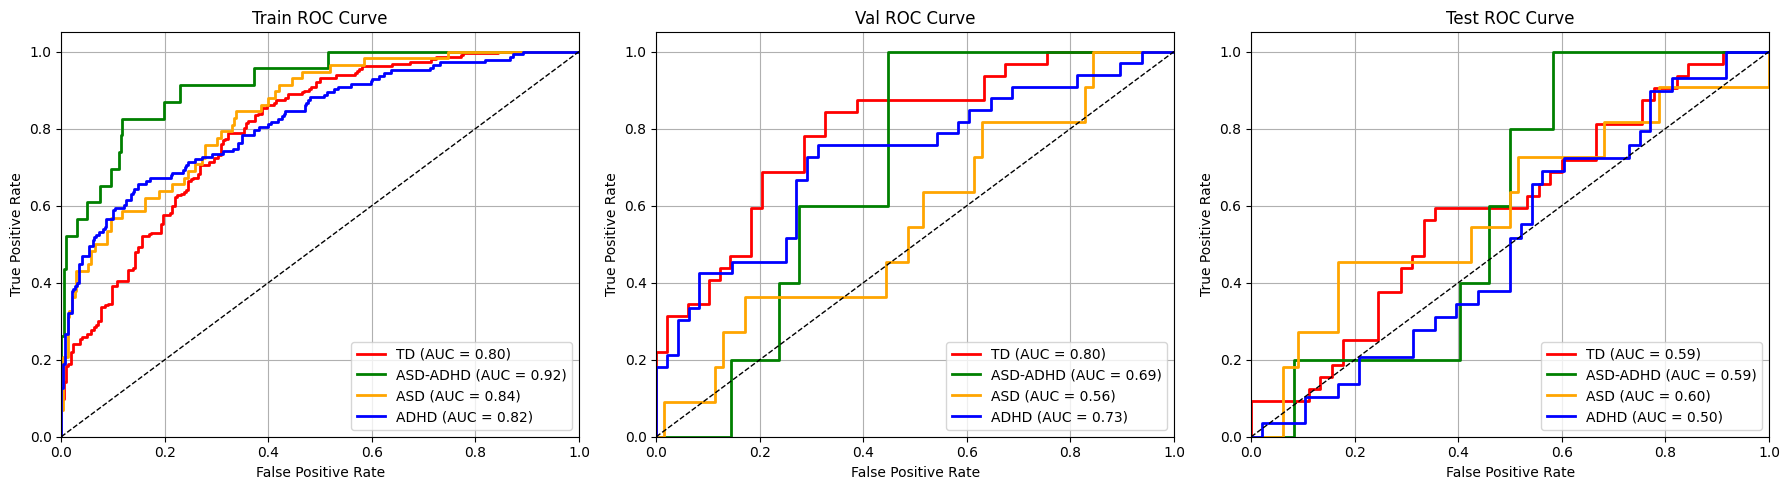

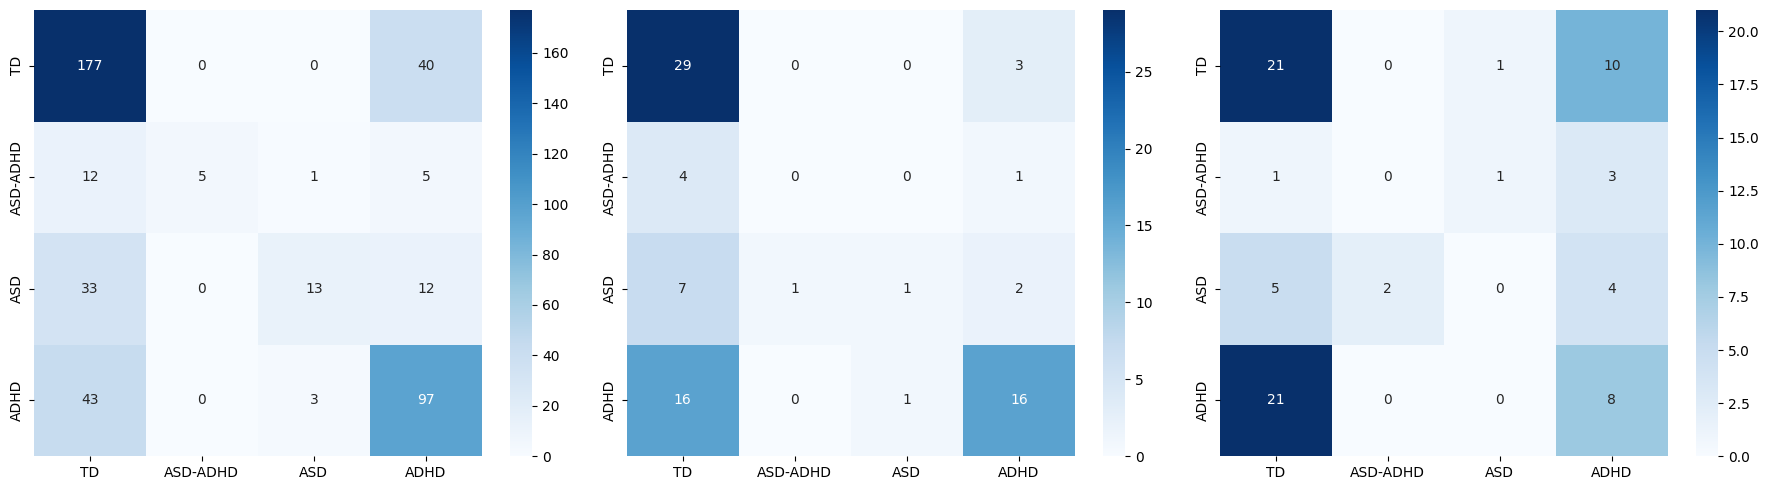

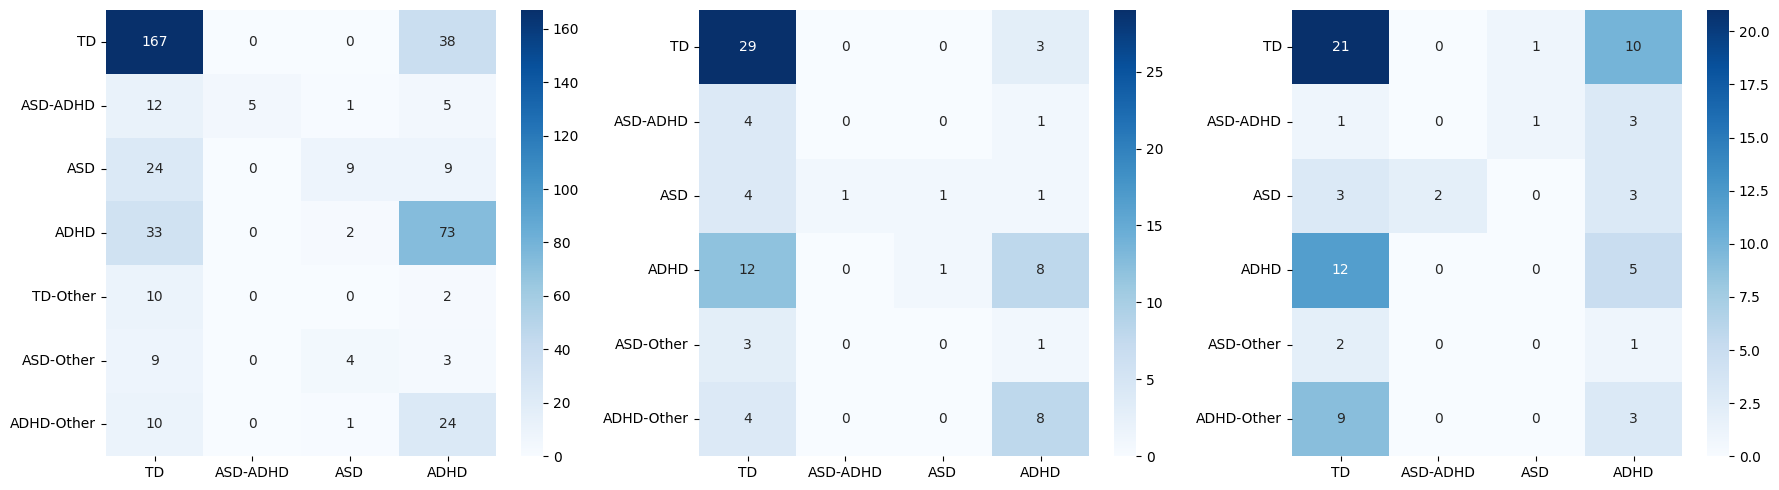

In [4]:
softmax_data = evaluate_model(yaml_file = "saved_models/GAT_Multi_S2_relative.yaml", 
                            model_file = "saved_models/GAT_Multi_S2_relative.pt", 
                            drop_strategy = 2, 
                            gat = True)

In [5]:
means = softmax_data[['label', 'predicted', 'TD', 'ASD-ADHD', 'ASD', 'ADHD']].groupby(['label', 'predicted']).mean().reset_index()
means['count'] = softmax_data[['label', 'predicted', 'TD']].groupby(['label', 'predicted']).count().reset_index()['TD']

In [10]:
d = epistemic(yaml_file = "saved_models/GAT_Multi_S2_relative.yaml", 
            model_file = "saved_models/GAT_Multi_S2_relative.pt", 
            dropout = 0.25, 
            forward_passes = 100,
            drop_strategy = 2, 
            gat = True,
            data_set = 'val')
f1_score(d['Label'], d['Predicted'], average='macro')

0.27667493796526055

********* BEFORE *********
Number of features: 272
Explained variance ratio: [0.2390044  0.10112435]
********* AFTER *********
Number of features: 8704
Explained variance ratio: [0.22639014 0.14022556]


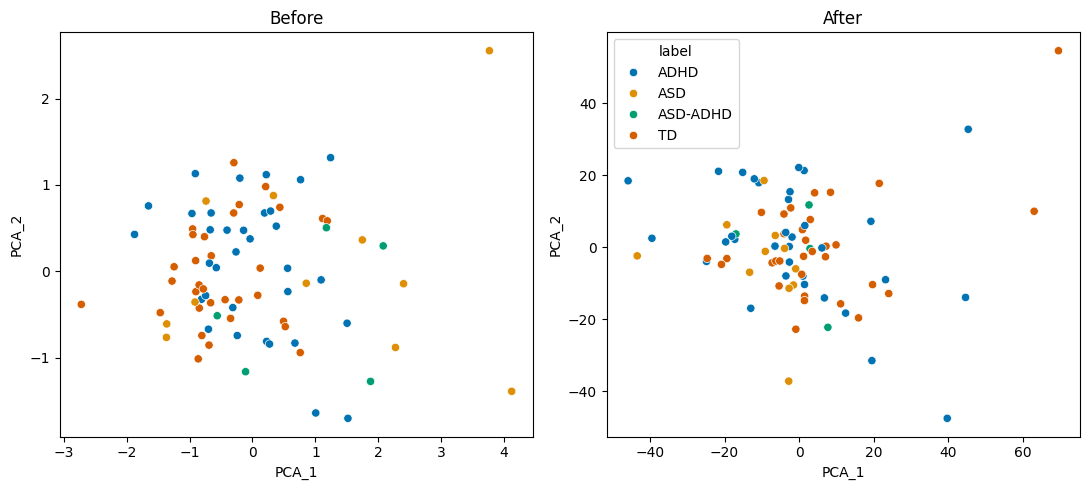

In [7]:
before, after = get_pca_plots(yaml_file = "saved_models/GAT_Multi_S2_relative.yaml", 
                                model_file = "saved_models/GAT_Multi_S2_relative.pt", 
                                drop_strategy = 2, 
                                gat = True, 
                                dataset = 'val')

# GAT Binary

train loss: 0.4492197036743164, accuracy: 74.38, f1:0.74
val loss: 0.3664683401584625, accuracy: 74.07, f1:0.72
test loss: 0.7494198083877563, accuracy: 61.04, f1:0.57


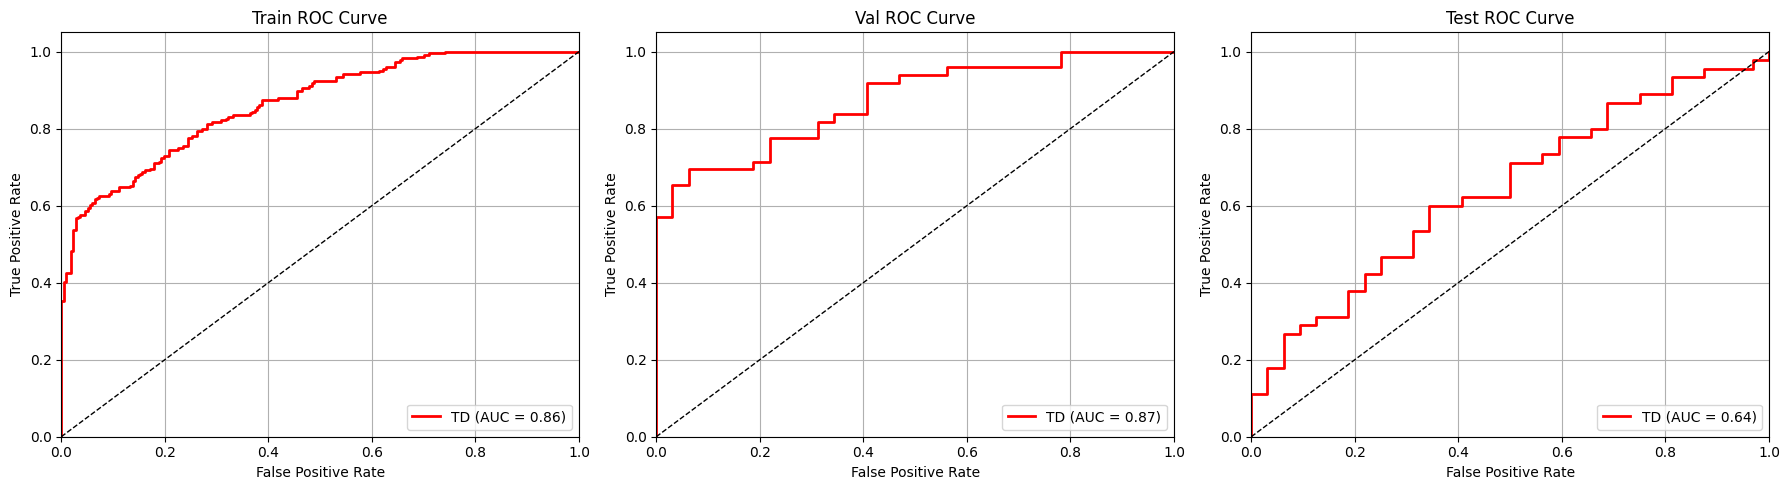

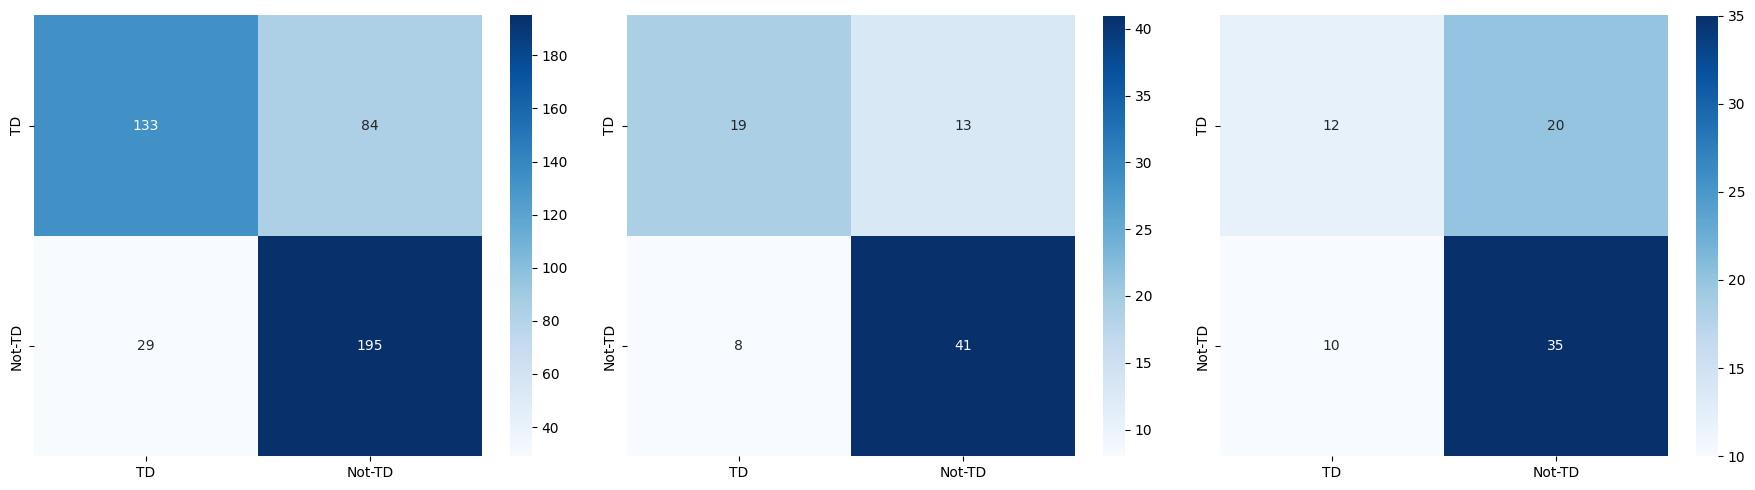

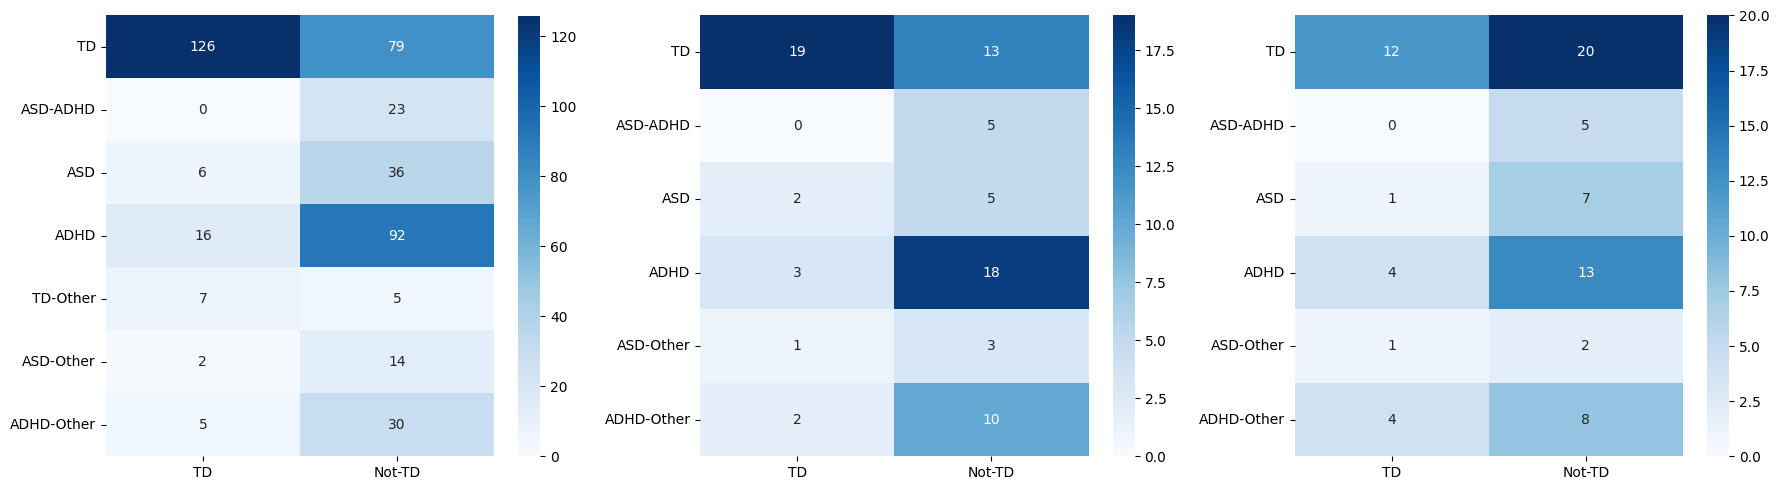

In [8]:
softmax_data = evaluate_model(yaml_file = "saved_models/GAT_Binary_S2_relative.yaml", 
                                model_file = "saved_models/GAT_Binary_S2_relative.pt", 
                                drop_strategy = 2,
                                gat = True)

********* BEFORE *********
Number of features: 272
Explained variance ratio: [0.2390044  0.10112435]
********* AFTER *********
Number of features: 4352
Explained variance ratio: [0.24847601 0.19217242]


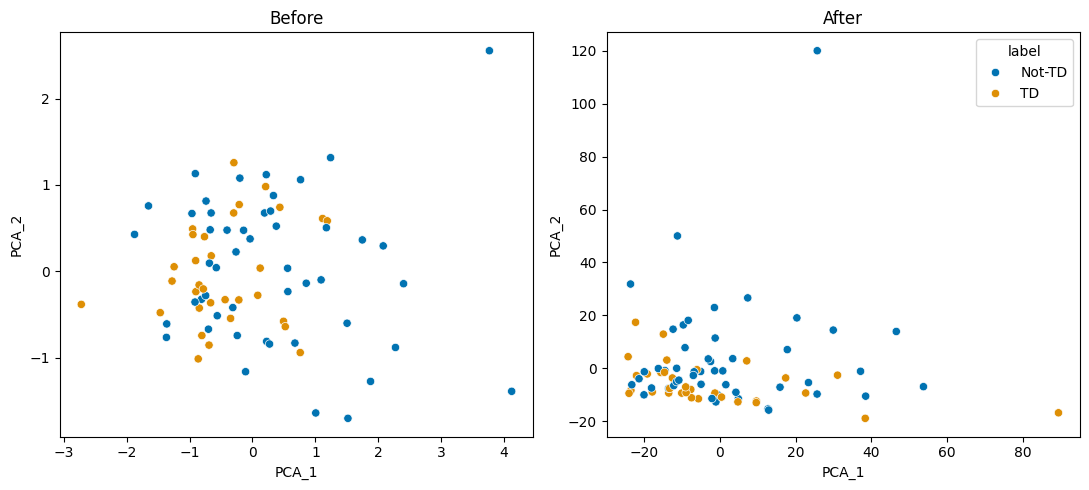

In [9]:
before, after = get_pca_plots(yaml_file = "saved_models/GAT_Binary_S2_relative.yaml", 
                                model_file = "saved_models/GAT_Binary_S2_relative.pt", 
                                drop_strategy = 2,
                                gat = True,
                                dataset = 'val')